In [1]:
# loading required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

1. Data aggregation: Aggregate average fare for men and women in the Titanic data set. Submit your answer in blackboard.

In [2]:
path = 'dataset/titanic-train.csv'
df = pd.read_csv(path)

In [3]:
df.shape

(891, 11)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
grouping = df.groupby('Sex').mean()['Fare']
grouping

Sex
female    44.479818
male      25.523893
Name: Fare, dtype: float64

<AxesSubplot:title={'center':'Average Fare by Gender'}, xlabel='Sex'>

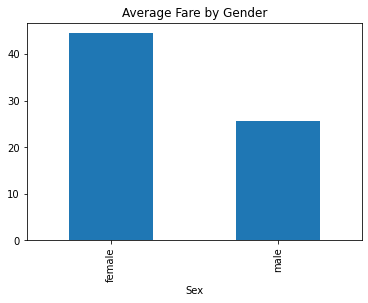

In [6]:
grouping.plot(kind='bar', title='Average Fare by Gender')

In [7]:
pd.crosstab(df['Sex'],df['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


<AxesSubplot:xlabel='Survived', ylabel='Sex'>

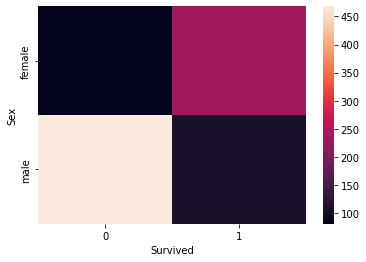

In [8]:
sns.heatmap(pd.crosstab(df['Sex'],df['Survived']))

2. Data transformation: Choose a numeric variable in Titanic and transform it using:
    - Discretization
    - Log
    - Zscore
    - min-max
    
  Include all transformations as new variables.Submit your workflow

In [9]:
df.info() # choosing 'age' attribute for discretization

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [10]:
# Discretization

df['AgeGroup']=pd.cut(df['Age'],bins=[0,16.336,32.252,48.168,64.084,100], 
                      labels=['Youth','Young Adult','Middle Age','Older','Much Older'])

In [11]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Young Adult
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Middle Age
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Middle Age
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Middle Age


In [12]:
# Log Transformation

df['Log-age'] = np.log10(df['Age'])

Text(0.5, 1.0, 'Log Transformation')

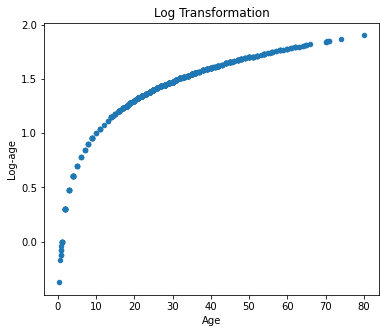

In [13]:
df.plot(kind='scatter',x='Age', y='Log-age', figsize=(6,5)).set_title('Log Transformation')

In [14]:
# Z Score
df['Age-Zscore'] = (df['Age'] - df['Age'].mean())/df['Age'].std()
df['Age-Zscore'] = df['Age-Zscore'].round(3)

In [15]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Log-age,Age-Zscore
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Young Adult,1.342423,-0.530
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Middle Age,1.579784,0.571
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult,1.414973,-0.255
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Middle Age,1.544068,0.365
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Middle Age,1.544068,0.365


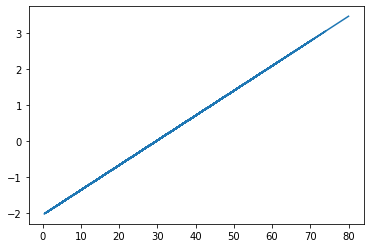

In [16]:
plt.plot(df['Age'],df['Age-Zscore'] )

In [17]:
# min-max transformation
df['min_max'] = (df['Age'] - df['Age'].min())/(df['Age'].max() - df['Age'].min())
df['min_max'] = df['min_max'].round(3)

In [18]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Log-age,Age-Zscore,min_max
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Young Adult,1.342423,-0.530,0.271
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Middle Age,1.579784,0.571,0.472
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult,1.414973,-0.255,0.321
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Middle Age,1.544068,0.365,0.435
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Middle Age,1.544068,0.365,0.435


3. Data Sampling: Produce a random sample of 100 examples out of the Titanic data.Produce a stratified sample of 100 examples of the titanic data.Use the different visualizations to compare differences.  Do you see any?  Explain why or why not. Submit your workflow and answer

<AxesSubplot:xlabel='Survived', ylabel='Sex'>

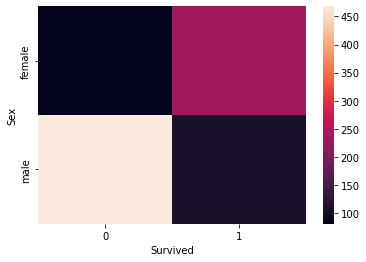

In [26]:
# before sampling
sns.heatmap(pd.crosstab(df['Sex'],df['Survived']))

In [23]:
# Random Sampling
random_df = df.sample(n=100)
random_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Log-age,Age-Zscore,min_max
175,176,0,3,male,18.0,1,1,350404,7.8542,NaN,S,Young Adult,1.255273,-0.805,0.221
592,593,0,3,male,47.0,0,0,A/5 3902,7.2500,NaN,S,Middle Age,1.672098,1.191,0.585
312,313,0,2,female,26.0,1,1,250651,26.0000,NaN,S,Young Adult,1.414973,-0.255,0.321
693,694,0,3,male,25.0,0,0,2672,7.2250,NaN,C,Young Adult,1.397940,-0.323,0.309
288,289,1,2,male,42.0,0,0,237798,13.0000,NaN,S,Middle Age,1.623249,0.847,0.522


<AxesSubplot:xlabel='Survived', ylabel='Sex'>

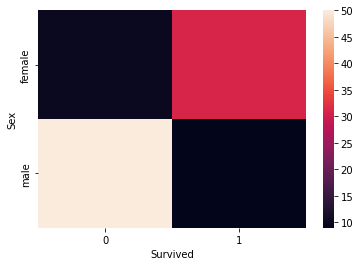

In [24]:
sns.heatmap(pd.crosstab(random_df['Sex'],random_df['Survived']))

In [35]:
# Stratified Sampling
N=100
stratified_df = df.groupby('Sex', group_keys=False).apply(lambda x: x.sample(int(np.rint(N*len(x)/len(df))))).sample(frac=1).reset_index(drop=True)

<AxesSubplot:xlabel='Survived', ylabel='Sex'>

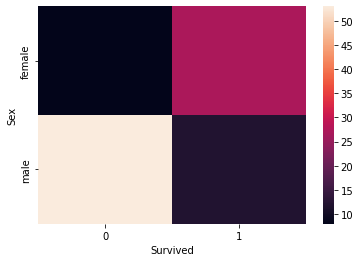

In [37]:
sns.heatmap(pd.crosstab(stratified_df['Sex'],stratified_df['Survived']))

#### Conclusion:
1. There is a difference between random sampling and stratified sampling
2. From the visualization of random and stratified sampling, we can notice that stratified sampling is quiet similar to visualization of population (before sampling viz)
3. Stratified sampling is a true representation of the population

https://www.statology.org/stratified-sampling-pandas/